# Modelo SIER

O modelo SIER inclui quatro compartimentos:

* **S(t)** : indivíduos suscetíveis
* **E(t)** : indivíduos expostos (infectados, mas não ainda infecciosos)
* **I(t)** : indivíduos infecciosos
* **R(t)** : indivíduos removidos (recuperados ou mortos)

A população total é:

$$
N = S(t) + E(t) + I(t) + R(t)
$$

As equações diferenciais que governam o modelo são:

$$
\begin{aligned}
\frac{dS}{dt} &= -\beta \cdot \frac{S I}{N} \\\\
\frac{dE}{dt} &= \beta \cdot \frac{S I}{N} - \sigma E \\\\
\frac{dI}{dt} &= \sigma E - \gamma I \\\\
\frac{dR}{dt} &= \gamma I
\end{aligned}
$$

---

### 📋 Parâmetros

* **$\beta$** : taxa de transmissão (contato entre \( S \) e \( I \))
* **$\sigma$** : taxa de progressão dos expostos para infectados (1/incubação)
* **$\gamma$** : taxa de recuperação
* **N** : população total (constante)

---

### 📊 Casos acumulados

Assim como no modelo SIR, podemos definir os casos acumulados como:

$$
C(t) = I(t) + R(t)
$$

E sua derivada é:

$$
\frac{dC}{dt} = \sigma E
$$

Esta expressão representa o número de **novos casos clínicos (sintomáticos)** por unidade de tempo, ou seja, a entrada de indivíduos no estado infeccioso.

---


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
import modelos_epidemiologicos as model 

Vamos supor uma população de 1000 indivíduos com uma pessoa infectada( **Io=1**). Se a taxa de contato  for 0.2 ( **β=0.2**) e a taxa de recuperaçãofor de 10 dias ( **γ=1/10**). Inicialmente o número de pessoas recuperadas é zero. (**Ro=0**). Como será a propagação da doença pelos próximos 200 dias.

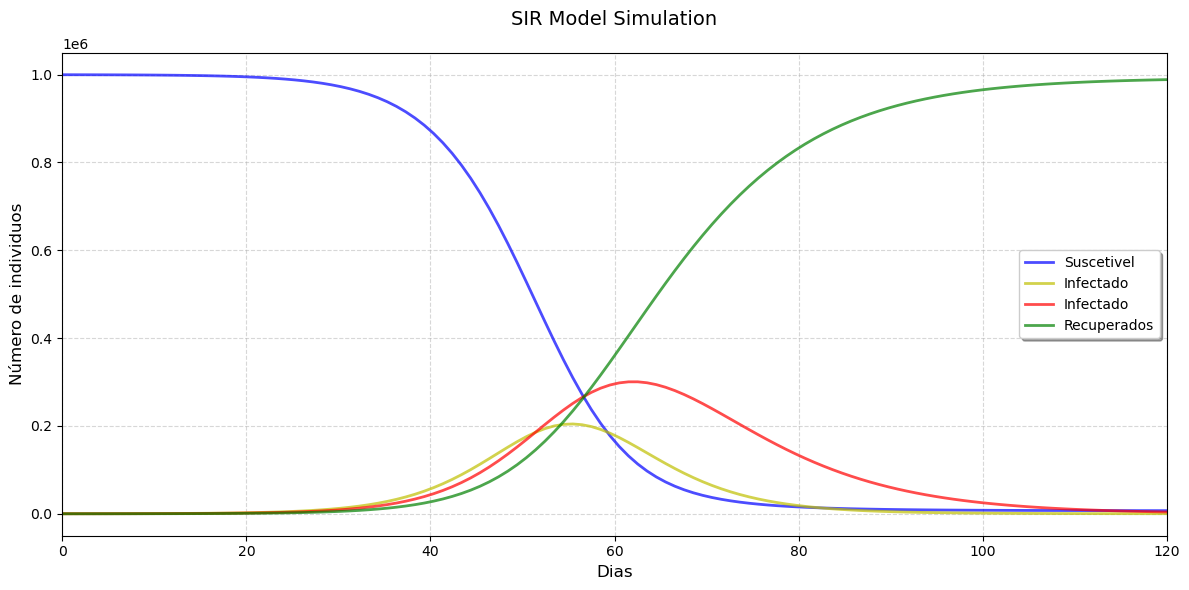

In [2]:
# Definindo parametros da população

# Parâmetros (COVID-19 exemplo)
N = 1000000      # População total
beta = 0.5       # Taxa de transmissão
alpha = 1/5.2    # Taxa de incubação (5,2 dias)
gamma = 1/10     # Taxa de recuperação (10 dias)

# Condições iniciais
E0 = 100  # Inicialmente 100 expostos
I0 = 50   # 50 infectados
R0 = 0
S0 = N - E0 - I0 - R0


# período
t=np.linspace(0,120,120)
#Suceptivel, infectados e Recuperados
y0 = [S0, E0, I0, R0]


out = odeint(model.SEIR, y0, t, args=(N, beta,alpha,gamma))
S,E,I, R = out.T 

# vizualização
plt.figure(figsize=(12, 6))

# Plot each compartment with distinct colors and labels
plt.plot(t, S, 'b-', alpha=0.7, lw=2, label='Suscetivel')
plt.plot(t, E, 'y-', alpha=0.7, lw=2, label='Infectado')
plt.plot(t, I, 'r-', alpha=0.7, lw=2, label='Infectado')
plt.plot(t, R, 'g-', alpha=0.7, lw=2, label='Recuperados')

# Add proper labels and title
plt.xlabel('Dias', fontsize=12)
plt.ylabel('Número de individuos', fontsize=12)
plt.title('SIR Model Simulation', fontsize=14, pad=20)

# Configure grid and legend
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=10, framealpha=1, shadow=True)
plt.xlim([0,120])
# Adjust layout and show
plt.tight_layout()
plt.show()

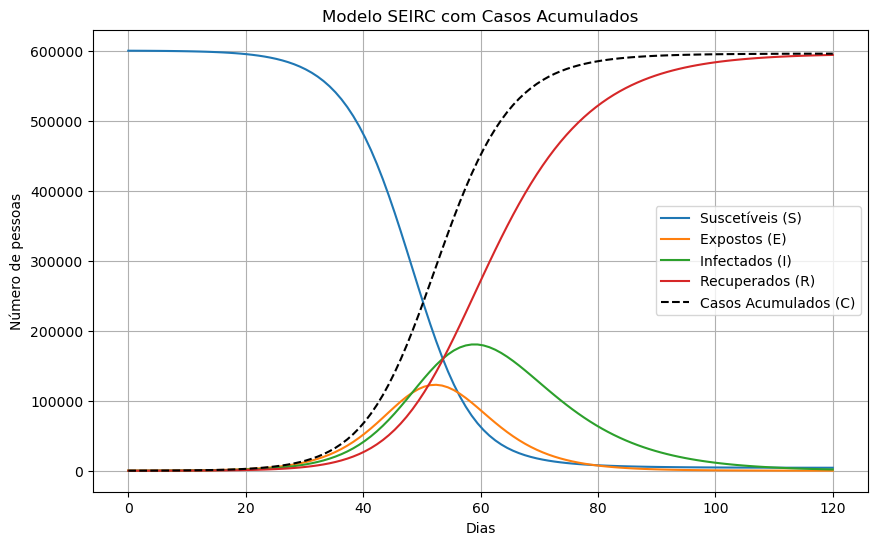

In [6]:
# Parâmetros (COVID-19 exemplo)
N = 600000       # População total
beta = 0.5          # Taxa de transmissão
alpha = 1/5.2       # Taxa de incubação (1/5.2 dias⁻¹)
gamma = 1/10        # Taxa de recuperação (1/10 dias⁻¹)

# Condições iniciais
E0 = 100            # 100 expostos inicialmente
I0 = 50             # 50 infectados
R0 = 0
C0 = I0             # Casos acumulados iniciais = infectados iniciais
S0 = N - E0 - I0 - R0

y0 = [S0, E0, I0, R0, C0]

# Tempo (dias)
t = np.linspace(0, 120, 120)

# Resolver as EDOs
out = odeint(model.SEIRC, y0, t, args=(N, beta, alpha, gamma))

S,E,I, R,C = out.T 

# Plotar resultados
plt.figure(figsize=(10, 6))
plt.plot(t, S, label='Suscetíveis (S)')
plt.plot(t, E, label='Expostos (E)')
plt.plot(t, I, label='Infectados (I)')
plt.plot(t, R, label='Recuperados (R)')
plt.plot(t, C, 'k--', label='Casos Acumulados (C)')
plt.xlabel('Dias')
plt.ylabel('Número de pessoas')
plt.title('Modelo SEIRC com Casos Acumulados')
plt.legend()
plt.grid()
plt.show()